In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt

In [2]:
n = 50
C = 4

CSV = {
    "Slow": pd.read_csv("slow.csv").fillna(0),
    "Balanced": pd.read_csv("balanced.csv").fillna(0),
    "Fast": pd.read_csv("fast.csv").fillna(0)
}

for key in CSV:
    CSV[key] = CSV[key][CSV[key]["type"] == "scalar"]
    CSV[key] = CSV[key][CSV[key]["module"].str.contains("SuperMarket.checkout.queues")]
    CSV[key] = CSV[key][CSV[key]["name"] == "queueingTime:mean"]


consistency = {}

Q = []
for i in range(C):
    Q.append(f"Q{i}")

for key in CSV:
    consistency[key] = pd.DataFrame(columns=Q)
    for i in range(C):
        temp = []
        temp = [CSV[key]["value"].values[j*C + i] for j in range(n)]
        string = f"Q{i}"
        temp = list(map(float, temp))
        consistency[key][string] = temp
    



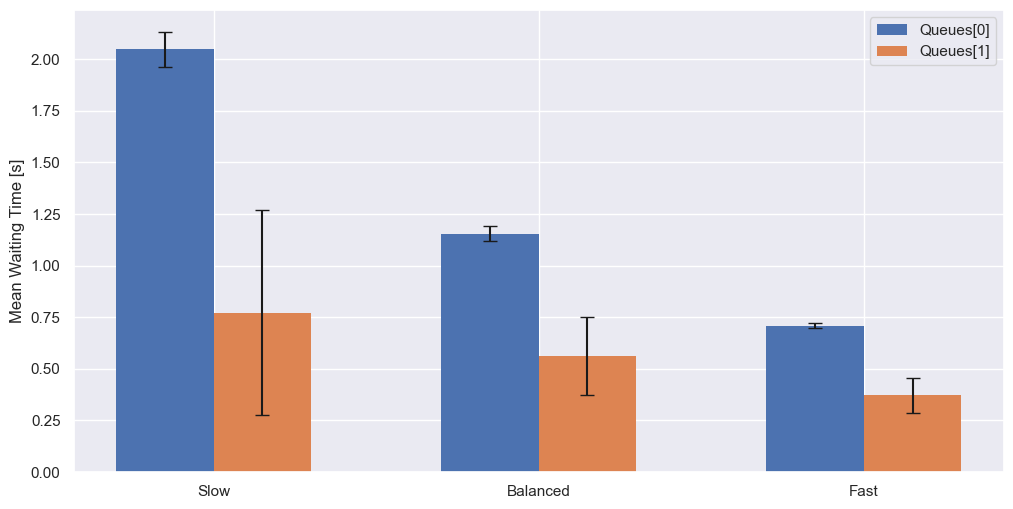

In [3]:
# width of the bars
barWidth = 0.3

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Choose the height of the bars
Q0_bars = []
Q1_bars = []
for key in consistency:
    Q0_bars.append(consistency[key]["Q0"].mean())
    Q1_bars.append(consistency[key]["Q1"].mean())


# Choose the height of the error bars 
yerr_Q0 = []
yerr_Q1 = []
for key in consistency:
    yerr_Q0.append(1.96 * (consistency[key]["Q0"].std() / math.sqrt(n)))
    yerr_Q1.append(1.96 * (consistency[key]["Q1"].std() / math.sqrt(n)))

# The x position of bars
r1 = np.arange(len(Q0_bars))
r2 = [x + barWidth for x in r1]
 
# Create Q0 bars
plt.bar(r1, Q0_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q0, capsize=5, label='Queues[0]', lw=0)
 
# Create Q1 bars
plt.bar(r2, Q1_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q1, capsize=5, label='Queues[1]', lw=0)
 
# General layout
plt.xticks([r + barWidth/2 for r in range(len(Q0_bars))], consistency.keys()) 

# Show graphic
# plt.title('Consistency Test: Bar Plot with CIs for the Waiting Time of Queues[0] and Queues[1] for the three different configurations')
plt.ylabel('Mean Waiting Time [s]')

plt.legend()
plt.show()



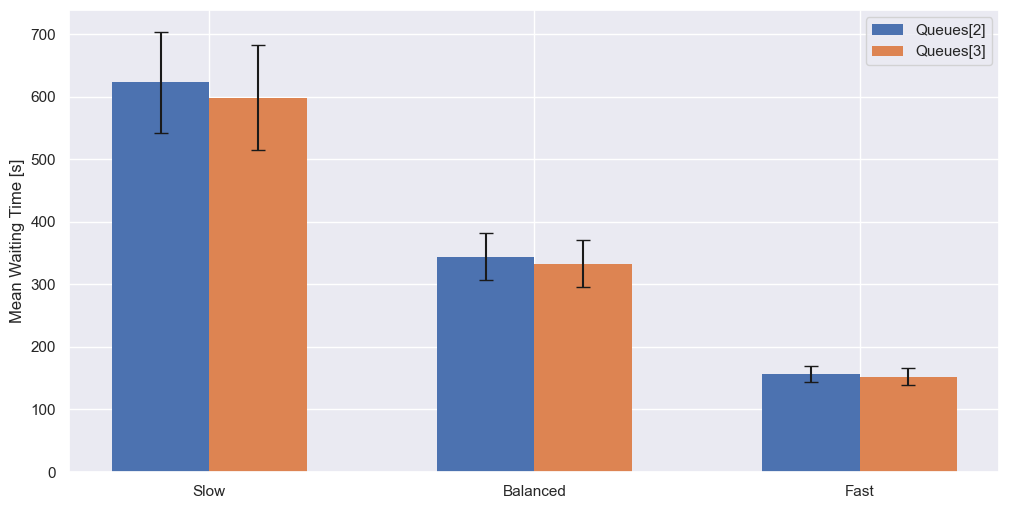

In [4]:
# width of the bars
barWidth = 0.3

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Choose the height of the bars
Q2_bars = []
Q3_bars = []
for key in consistency:
    Q2_bars.append(consistency[key]["Q2"].mean())
    Q3_bars.append(consistency[key]["Q3"].mean())


# Choose the height of the error bars 
yerr_Q2 = []
yerr_Q3 = []
for key in consistency:
    yerr_Q2.append(1.96 * (consistency[key]["Q2"].std() / math.sqrt(n)))
    yerr_Q3.append(1.96 * (consistency[key]["Q3"].std() / math.sqrt(n)))


# The x position of bars
r1 = np.arange(len(Q2_bars))
r2 = [x + barWidth for x in r1]
 
# Create Q2 bars
plt.bar(r1, Q2_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q2, capsize=5, label='Queues[2]', lw=0)
 
# Create Q3 bars
plt.bar(r2, Q3_bars, width = barWidth, edgecolor = 'black', yerr=yerr_Q3, capsize=5, label='Queues[3]', lw=0)
 
# General layout
plt.xticks([r + barWidth/2 for r in range(len(Q2_bars))], consistency.keys())

# Show graphic
# plt.title('Consistency Test: Bar Plot with CIs for the Waiting Time of Queues[2] and Queues[3] for the three different configurations')
plt.ylabel('Mean Waiting Time [s]')

plt.legend()
plt.show()
